In [57]:
import os
import time
import pandas as pd
import numpy as np
import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import decomposition
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.corpus import stopwords
from pylab import plt
from matplotlib.pyplot import plot

In [43]:
# Read the dataset

dataset = pd.read_csv('label_neu.csv', encoding='utf8')

# x = datetime.datetime(2019, 1, 11)

# corpus = dataset[pd.to_datetime(dataset.CreatedTime) > x]

print('Corpus Read')
print(len(corpus))

Corpus Read
39749


In [58]:
dataset = pd.read_csv('label_pos.csv', encoding='utf8')
dataset.head(10)
corpus = dataset[dataset['label'] == 1]

print('Negative Corpus Read')
print(len(corpus))
print(corpus)

Negative Corpus Read
61873
                                                   tweet  compound    neg  \
0                please put a location in daytona thanks    0.6369  0.000   
1      how is it can disable all tabs and disable my ...    0.7181  0.053   
2                    k we good here thanks but no thanks    0.6059  0.207   
3      ways to manage multiple corporate offices and ...    0.8074  0.000   
4                       atm rebate is the best thank you    0.7717  0.000   
...                                                  ...       ...    ...   
61868  have to say when i call i always get amazing c...    0.7650  0.000   
61869  do not think anyone will want to see me write ...    0.7783  0.000   
61870        thanks same to all of you god bless you all    0.7783  0.000   
61871  navy federal has stood beside me i needed a ca...    0.6369  0.000   
61872  happy new years i pray my loan gets approved t...    0.8316  0.000   

         neu    pos  label  
0      0.435  0.565

In [59]:
# Filter short length word

corpus = corpus.tweet.values.astype('U')

count = 0
for document in corpus:
    words_list = document.split()
    ##print(words_list)
    resultwords  = [word for word in words_list if len(word) > 2]
    corpus[count] = ' '.join(resultwords)
    count += 1
    
print(type(corpus))
print(corpus[0])
print(len(corpus))

<class 'numpy.ndarray'>
please put location daytona thanks
61873


In [61]:
## Filter stop word

stop_words = set(stopwords.words('english'))

stop_words.add('navy')
stop_words.add('navyfederal')
stop_words.add('federal')

In [62]:
# Vector

vectorizer = TfidfVectorizer(binary = True, max_features = 7000, stop_words=stop_words, ngram_range = (1,1))

X = vectorizer.fit_transform(corpus)
print(X.toarray())    
print(X.shape)

vocab = np.array(vectorizer.get_feature_names())
print(vocab)
print(len(vocab))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(61873, 7000)
['aaron' 'abby' 'abilene' ... 'zombies' 'zone' 'zulu']
7000


In [41]:
# LSA_1
# num_tops = 10
# words_topic = 2
# def show_topics(Vh):
#     top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-words_topic-1:-1]]
#     topic_words = ([top_words(t) for t in Vh])
#     return [' '.join(t) for t in topic_words]

# U, sigma, Vh = decomposition.randomized_svd(X, num_tops)
# print("U:\n", U, "\n")
# print("SIGMA:\n", sigma, "\n")
# print("Vh:\n", Vh, "\n")

# show_topics(Vh)

In [63]:
# lSA_2
svd_model = decomposition.TruncatedSVD(n_components=3, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

print(len(svd_model.components_))

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(vocab, comp)
    
    sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:7]

    print("\n \n Topic "+str(i)+": ")

    for t in sorted_terms:

        print(t[0], end = ' ')

3

 
 Topic 0: 
cheering loud proud midshipmen notre dame love 
 
 Topic 1: 
love union credit best thanks thank would 
 
 Topic 2: 
love nfcu bank fed guys years yrs 

In [64]:
# LDA
def build_lda(X, num_of_topics = 3):
    lda = LDA(n_components = num_of_topics, max_iter = 5, learning_method = "online", random_state = 122)
    lda.fit(X)

    return lda

def display_word_distribution(model, feature_names, n_word):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        words = []
        for i in topic.argsort()[:-n_word - 1:-1]:
            words.append(feature_names[i])
        print(words)
        
start = time.time()
number_topics = 4
for i in range(2, number_topics):
    lda_model = build_lda(X, i)
    display_word_distribution(model=lda_model, feature_names=vocab, n_word=10)
    print()

print("Took " + str(time.time()-start) + " to extract topics!")

Topic 0:
['credit', 'please', 'would', 'union', 'like', 'thanks', 'help', 'call', 'know', 'time']
Topic 1:
['love', 'great', 'nfcu', 'best', 'proud', 'thanks', 'thank', 'years', 'awesome', 'good']

Topic 0:
['great', 'years', 'good', 'thank', 'service', 'member', 'credit', 'union', 'family', 'many']
Topic 1:
['love', 'proud', 'best', 'nfcu', 'thanks', 'bank', 'loud', 'cheering', 'yes', 'midshipmen']
Topic 2:
['please', 'would', 'thanks', 'like', 'credit', 'help', 'call', 'know', 'thank', 'union']

Took 92.75722813606262 to extract topics!


1 673.8314916841039
2 645.224616549369
3 637.4321959906448
4 629.9233723856439
5 622.6526381811674
6 616.6131437620879
7 614.0572887337773
8 613.2926808755755
9 607.8072216925776
10 604.9630936746926
11 598.6547987930314
12 601.1109972517165
13 597.363466001454
14 599.1871116394651
15 592.0179510880506
16 590.2434513351905
17 591.6167489701554
18 587.9490553788082
19 588.1204765542487


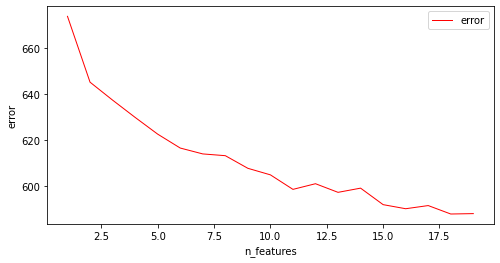

In [65]:
#K-Means
from sklearn.cluster import KMeans

# Finds optimal K
def train(X,vectorizer,true_k=10,showLable = False):
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=10000, n_init=1, verbose=False)
    km.fit(X)
    return km.inertia_ 

true_ks = []
scores = []
for i in range(1,20,1):        
    score = train(X,vectorizer,true_k=i)/len(document)
    print(i,score)
    true_ks.append(i)
    scores.append(score)
plt.figure(figsize=(8,4))
plt.plot(true_ks,scores,label="error",color="red",linewidth=1)
plt.xlabel("n_features")
plt.ylabel("error")
plt.legend()
plt.show()

In [66]:
true_k = 5
clf = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=1, verbose=False)
s = clf.fit(X)

#20个中心点
print(len(clf.cluster_centers_))
print(clf.cluster_centers_)
print("---------------------")  


#每个样本所属的簇
i = 1
dic = {}
while i < len(clf.labels_):
    if clf.labels_[i] in dic:
        dic[clf.labels_[i]] += 1
    else:
        dic[clf.labels_[i]] = 1
    i = i + 1
print(dic)
print("---------------------")

print("Top terms per cluster:")
order_centroids = clf.cluster_centers_.argsort()[:, ::-1]
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :15]:
        print(' %s' % vocab[ind], end='')
    print()

5
[[3.94106481e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.48669634e-04 2.92705045e-05 6.77877383e-05 ... 1.37768221e-04
  9.61493417e-05 8.41844581e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.19367506e-04 1.84575059e-04 0.00000000e+00 ... 0.00000000e+00
  1.08732520e-02 0.00000000e+00]
 [2.30033798e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
---------------------
{1: 48983, 0: 2381, 4: 2713, 3: 4511, 2: 3284}
---------------------
Top terms per cluster:
Cluster 0: love nfcu bank member thanks best years fed guys missy absolutely since service card members
Cluster 1: thanks great thank best happy help love credit would know please like good service call
Cluster 2: cheering loud proud midshipmen notre dame irish beat sorry vet usn twitter com least saturdays
Cluster 3: send message private please would number like contact look reach tim

In [67]:
start = time.time()
cluster_id = 3
count = 0
new_corpus = []
for document in corpus:
    if clf.labels_[count] != cluster_id:
        new_corpus.append(document)
    count += 1

new_corpus = np.array(new_corpus)
print(len(new_corpus))

new_vectorizer = TfidfVectorizer(binary = True, max_features = 100000, stop_words=stop_words, ngram_range = (1,1))

new_X = new_vectorizer.fit_transform(new_corpus)

new_vocab = np.array(new_vectorizer.get_feature_names())

max_number_topics = 10
for i in range(2, max_number_topics):
    print('only', i, 'topics: ')
    new_lda_model = build_lda(new_X, i)
    display_word_distribution(model=new_lda_model, feature_names=new_vocab, n_word=10)
    print()

print("Took " + str(time.time()-start) + " to extract topics!")

57362
only 2 topics: 
Topic 0:
['love', 'thanks', 'credit', 'thank', 'union', 'best', 'great', 'please', 'help', 'would']
Topic 1:
['proud', 'loud', 'cheering', 'midshipmen', 'good', 'love', 'luck', 'chance', 'lol', 'win']

only 3 topics: 
Topic 0:
['credit', 'thanks', 'union', 'please', 'help', 'would', 'best', 'know', 'like', 'call']
Topic 1:
['proud', 'loud', 'cheering', 'midshipmen', 'dame', 'notre', 'lol', 'talent', 'building', 'haha']
Topic 2:
['love', 'nfcu', 'great', 'awesome', 'thank', 'thanks', 'years', 'service', 'family', 'good']

only 4 topics: 
Topic 0:
['credit', 'thanks', 'union', 'best', 'please', 'great', 'thank', 'help', 'would', 'nfcu']
Topic 1:
['proud', 'loud', 'cheering', 'midshipmen', 'dame', 'notre', 'picture', 'talent', 'building', 'fits']
Topic 2:
['serve', 'many', 'kind', 'family', 'military', 'words', 'years', 'join', 'welcome', 'thanks']
Topic 3:
['love', 'luck', 'good', 'god', 'chance', 'win', 'story', 'bless', 'grand', 'prize']

only 5 topics: 
Topic 0:
